In [90]:
import matplotlib.pyplot as plt

In [91]:
rows = 10
cols = 10
obstacles = [(6,4),(7,4),(8,4),(6,5),(6,6),(8,5)]
map = [ [True if (j,i) in obstacles else False for i in range(cols)] for j in range(rows)]

In [92]:
class Node:
  def __init__(self, x, y, isObstacle=False):
    self.f = 0
    self.g = 0
    self.h = 0

    self.x = x
    self.y = y

    self.prev = None
    self.isObstacle = isObstacle

  def find_neighbours(self, grid):
    x,y = self.x, self.y
    coordinates = [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]

    def validate_node(coordinate):
      if coordinate[0] < 0 or coordinate[1] < 0 or coordinate[0] >= cols or coordinate[1] >= rows or grid[coordinate[1]][coordinate[0]].isObstacle:
          return False
      return True

    neighbours = [grid[coordinate[1]][coordinate[0]] for coordinate in coordinates if validate_node(coordinate)]
    return neighbours

In [93]:
grid = [ [Node(i,j, map[i][j]) for i in range(cols)] for j in range(rows)]
start = grid[0][0]
end = grid[5][7]
openSet = [start,]
closedSet = []

In [94]:
while len(openSet)>0:

  current = min(openSet, key = lambda node: node.f)
  if current == end:
    print("Reached")
    break
  openSet.remove(current)
  closedSet.append(current)
  neighbours = current.find_neighbours(grid)

  for neighbour in neighbours:
    if neighbour in closedSet:
      continue
    g = current.g + 1
    if neighbour not in openSet:
      openSet.append(neighbour)
    elif g >= neighbour.g:
        continue
      
    neighbour.g = g
    neighbour.h = (abs(neighbour.x-end.x) + abs(neighbour.y-end.y))
    neighbour.f = neighbour.g + neighbour.h
    neighbour.prev = current

Reached


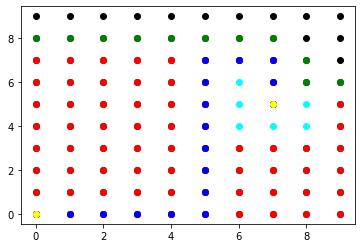

In [95]:
for row in grid:
  for node in row:
    plt.scatter(node.x, node.y, c="cyan" if node.isObstacle else "black")
for node in openSet:
  plt.scatter(node.x, node.y, c="green")
for node in closedSet:
  plt.scatter(node.x, node.y, c="red")

path = end
while path is not None:
  plt.scatter(path.x,path.y, c="blue")
  path = path.prev

plt.scatter(start.x, start.y, c="yellow")
plt.scatter(end.x, end.y, c="yellow")
plt.show()